In [82]:
#Importing pandas

import pandas as pd


In [83]:
#Loading the datatset
df = pd.read_csv('Dataset .csv')

In [84]:
#Checking the number of rows and columns in the dataset
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (9551, 21)


In [85]:
#Displaying the first 5 rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [86]:
#Defining headers of the dataset
headers = df.columns.values.tolist()
headers

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [87]:
#Extracting the necessary columns needed for prediction
df_nec = df[['City','Locality','Cuisines','Average Cost for two','Has Table booking','Has Online delivery','Is delivering now','Price range','Votes','Aggregate rating']]

In [88]:
#Cleaning the column names
df_nec.columns = df_nec.columns.str.replace(' ', '_').str.lower()

In [89]:
df_nec.columns

Index(['city', 'locality', 'cuisines', 'average_cost_for_two',
       'has_table_booking', 'has_online_delivery', 'is_delivering_now',
       'price_range', 'votes', 'aggregate_rating'],
      dtype='object')

In [90]:
#Previewing the cleaned dataset
df_nec.head()

,city,locality,cuisines,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,price_range,votes,aggregate_rating
0,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Yes,No,No,3,314,4.8
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Yes,No,No,3,591,4.5
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Yes,No,No,4,270,4.4
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,No,No,No,4,365,4.9
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Yes,No,No,4,229,4.8


In [91]:
#Checking any missing_Values:
missing_values = df_nec.isnull()
for col in df_nec.columns:
    print(missing_values[col].value_counts())


city
False    9551
Name: count, dtype: int64
locality
False    9551
Name: count, dtype: int64
cuisines
False    9542
True        9
Name: count, dtype: int64
average_cost_for_two
False    9551
Name: count, dtype: int64
has_table_booking
False    9551
Name: count, dtype: int64
has_online_delivery
False    9551
Name: count, dtype: int64
is_delivering_now
False    9551
Name: count, dtype: int64
price_range
False    9551
Name: count, dtype: int64
votes
False    9551
Name: count, dtype: int64
aggregate_rating
False    9551
Name: count, dtype: int64


In [92]:
#Checking the summary of missing values
df_nec.isnull().sum()

city                    0
locality                0
cuisines                9
average_cost_for_two    0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
price_range             0
votes                   0
aggregate_rating        0
dtype: int64

In [93]:
#Dealing with missing_value for cuisine feature:
import numpy as np
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_nec.loc[:,'cuisines'] =imputer_mode.fit_transform(df_nec[['cuisines']])

In [94]:
#Confirming the missing values are handled
missing_values = df_nec.isnull().sum()
missing_values

city                    0
locality                0
cuisines                0
average_cost_for_two    0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
price_range             0
votes                   0
aggregate_rating        0
dtype: int64

In [95]:
# checking for zero values in the dataset
zero_cols = (df_nec==0).sum()
zero_cols

city                       0
locality                   0
cuisines                   0
average_cost_for_two      18
has_table_booking          0
has_online_delivery        0
is_delivering_now          0
price_range                0
votes                   1094
aggregate_rating        2148
dtype: int64

In [96]:
#Dealing with 0 value  with median value for average_cost_for_two col:
df_nec =df_nec.copy()
df_nec['average_cost_for_two'] = df_nec['average_cost_for_two'].astype(float)
df_nec.loc[:,'average_cost_for_two'] = df_nec['average_cost_for_two'].replace(0, np.nan)
df_nec.loc[:,'average_cost_for_two'] = df_nec['average_cost_for_two'].fillna(df_nec['average_cost_for_two'].median())


In [97]:
#Dropping the rows of aggregate_rating ==0
df_nec = df_nec[df_nec['aggregate_rating'] != 0]

In [98]:
#Confirming data has been cleaned or not
df_nec.isnull().sum()

city                    0
locality                0
cuisines                0
average_cost_for_two    0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
price_range             0
votes                   0
aggregate_rating        0
dtype: int64

In [99]:
#Checking if any zero ratings remaining or not
print("Ratings with zero:", (df_nec['aggregate_rating'] == 0).sum())


Ratings with zero: 0


In [100]:
#converting <unset> to NaN
df_nec.replace('<unset>', pd.NA)

,city,locality,cuisines,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,price_range,votes,aggregate_rating
0,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100.0,Yes,No,No,3,314,4.8
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200.0,Yes,No,No,3,591,4.5
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000.0,Yes,No,No,4,270,4.4
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500.0,No,No,No,4,365,4.9
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500.0,Yes,No,No,4,229,4.8
...,...,...,...,...,...,...,...,...,...,...
9546,��stanbul,Karak�_y,Turkish,80.0,No,No,No,3,788,4.1
9547,��stanbul,Ko��uyolu,"World Cuisine, Patisserie, Cafe",105.0,No,No,No,3,1034,4.2
9548,��stanbul,Kuru�_e��me,"Italian, World Cuisine",170.0,No,No,No,4,661,3.7
9549,��stanbul,Kuru�_e��me,Restaurant Cafe,120.0,No,No,No,4,901,4.0


In [101]:
#Dropping any remaining nulls in key cols
df_nec=df_nec.dropna(subset=['aggregate_rating','cuisines','average_cost_for_two','votes'])

In [102]:
#Shape after final cleaning
df_nec.shape

(7403, 10)

In [103]:
#Final diagnostic <unset> exists or not
print("Total '<unset>' values:", (df_nec == '<unset>').sum().sum())


Total '<unset>' values: 0


In [104]:
df_nec.head()

,city,locality,cuisines,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,price_range,votes,aggregate_rating
0,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100.0,Yes,No,No,3,314,4.8
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200.0,Yes,No,No,3,591,4.5
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000.0,Yes,No,No,4,270,4.4
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500.0,No,No,No,4,365,4.9
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500.0,Yes,No,No,4,229,4.8


In [105]:
#Checking value counts for the categorical cols and defining the categorical ordinals
categorical_ordinal = ['has_online_delivery','is_delivering_now','has_table_booking']
for col in categorical_ordinal:
    print(df_nec[col].value_counts(dropna=False))

has_online_delivery
No     5048
Yes    2355
Name: count, dtype: int64
is_delivering_now
No     7370
Yes      33
Name: count, dtype: int64
has_table_booking
No     6292
Yes    1111
Name: count, dtype: int64


In [106]:
#Defining the categorical cols
categorical_cols = ['city', 'locality', 'cuisines']
categorical_cols

['city', 'locality', 'cuisines']

In [107]:
#Defining the numerical cols
numerical_cols = ['average_cost_for_two', 'votes']
numerical_cols

['average_cost_for_two', 'votes']

In [108]:
#ordinal encoding for categorical_ordinals
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_nec[categorical_ordinal] = ordinal_encoder.fit_transform(df_nec[categorical_ordinal])


In [109]:
#Onehot encoding for the categorical cols
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False),categorical_cols)], remainder='passthrough')
df_1 = pd.DataFrame(ct.fit_transform(df_nec).astype('object'))
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,3028,3029,3030,3031,3032,3033,3034,3035,3036,3037
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1100.0,1.0,0.0,0.0,3.0,314.0,4.8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1200.0,1.0,0.0,0.0,3.0,591.0,4.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4000.0,1.0,0.0,0.0,4.0,270.0,4.4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1500.0,0.0,0.0,0.0,4.0,365.0,4.9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1500.0,1.0,0.0,0.0,4.0,229.0,4.8


In [110]:
#Creating Preprocessing Pipeline
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer(
    [   ('cat_ordinal',OrdinalEncoder(),categorical_ordinal),
        ( 'cat',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),categorical_cols),
        ('num',StandardScaler(),numerical_cols)
    ]
)

In [111]:
preprocessor

,transformers,"[('cat_ordinal', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [112]:
#Defining features and target
X = df_nec.iloc[:,:-1]
y = df_nec.iloc[:,-1]

In [113]:
#Splitting_the dataset based on predictor and target cols
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)
print(f"X_train.shape: {X_train.shape}\ny_train.shape: {y_train.shape}\nX_test.shape: {X_test.shape}\ny_test.shape: {y_test.shape}")

X_train.shape: (5922, 9)
y_train.shape: (5922,)
X_test.shape: (1481, 9)
y_test.shape: (1481,)


In [114]:
#checking the type of x_train
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [115]:
#checking the training features
X_train.columns.tolist()

['city',
 'locality',
 'cuisines',
 'average_cost_for_two',
 'has_table_booking',
 'has_online_delivery',
 'is_delivering_now',
 'price_range',
 'votes']

In [116]:
#Transforming features using pipeline
X_train_transformed = preprocessor.fit_transform(X_train)
print(X_train_transformed.shape)
print(type(X_train_transformed))


(5922, 2654)
<class 'numpy.ndarray'>


In [117]:
#Transformed test set
X_test_transformed = preprocessor.transform(X_test)
print(X_test_transformed.shape)
print(type(X_test_transformed))

(1481, 2654)
<class 'numpy.ndarray'>


In [118]:
#Displaying the cols used in pipeline
print("X columns going into pipeline:")
print(X.columns.tolist())

print("Categorical columns for one-hot encoding:")
print(categorical_cols)


X columns going into pipeline:
['city', 'locality', 'cuisines', 'average_cost_for_two', 'has_table_booking', 'has_online_delivery', 'is_delivering_now', 'price_range', 'votes']
Categorical columns for one-hot encoding:
['city', 'locality', 'cuisines']


In [119]:
#Inintializing the  models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import  Lasso
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rg = Ridge(alpha=1.0)
ls = Lasso(alpha=0.1)



In [120]:
#Train the  linear model
lr.fit(X_train_transformed, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [121]:
#training the decisiontree model
dt.fit(X_train_transformed, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [122]:
#training the ridge regression model
rg.fit(X_train_transformed, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [123]:
#training the lasso regression model
ls.fit(X_train_transformed, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [124]:
#predictions based on each model
y_pred_lr = lr.predict(X_test_transformed)
y_pred_dt = dt.predict(X_test_transformed)
y_pred_rg = rg.predict(X_test_transformed)
y_pred_ls = ls.predict(X_test_transformed)

In [125]:
#Clip predictions to valid rating range(0-5)
import numpy as np

y_pred_lr = np.clip(y_pred_lr,0,5)
y_pred_dt = np.clip(y_pred_dt,0,5)
y_pred_rg = np.clip(y_pred_rg,0,5)
y_pred_ls = np.clip(y_pred_ls,0,5)

In [126]:
#checking the rating distribution
y.value_counts(normalize =True)

aggregate_rating
3.2    0.070512
3.1    0.070107
3.4    0.067270
3.3    0.065244
3.5    0.064839
3.0    0.063218
3.6    0.061867
3.7    0.057679
3.8    0.054032
2.9    0.051466
3.9    0.045252
2.8    0.042550
4.1    0.037012
4.0    0.035931
2.7    0.033770
4.2    0.029853
2.6    0.025800
4.3    0.023504
4.4    0.019452
2.5    0.014859
4.5    0.012833
2.4    0.011752
4.6    0.010536
4.9    0.008240
2.3    0.006349
4.7    0.005673
2.2    0.003647
4.8    0.003377
2.1    0.002026
2.0    0.000946
1.9    0.000270
1.8    0.000135
Name: proportion, dtype: float64

In [127]:
#EVALUATION FUNCTION definition
from sklearn.metrics import mean_squared_error,r2_score
def evaluate_model(name,y_true,y_pred):
    print(f"\n{name} Evaluation: ")
    print("Mean Squared Error(MSE):",round(mean_squared_error(y_true,y_pred),3))
    print("R² Score:",round(r2_score(y_true,y_pred),3))

In [128]:
#evaluating the linear model
evaluate_model("Linear Regression",y_test,y_pred_lr)


Linear Regression Evaluation: 
Mean Squared Error(MSE): 0.166
R² Score: 0.464


In [129]:
#evaluation of decision tree model
evaluate_model("Decision Tree Regressor",y_test,y_pred_dt)


Decision Tree Regressor Evaluation: 
Mean Squared Error(MSE): 0.197
R² Score: 0.363


In [130]:
#evluation of ridge regression model
evaluate_model("Ridge Regression",y_test,y_pred_rg)


Ridge Regression Evaluation: 
Mean Squared Error(MSE): 0.141
R² Score: 0.545


In [131]:
#evalution of lasso regression model
evaluate_model("Lasso Regression",y_test,y_pred_ls)


Lasso Regression Evaluation: 
Mean Squared Error(MSE): 0.27
R² Score: 0.126


In [132]:
#Comparision of rmse and r^2 across models
from sklearn.metrics import mean_squared_error, r2_score

# Store all metrics
models = ['Linear', 'Decision Tree', 'Ridge', 'Lasso']
y_preds = [y_pred_lr, y_pred_dt, y_pred_rg, y_pred_ls]

rmse = []
r2 = []

for y_pred in y_preds:
    rmse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))

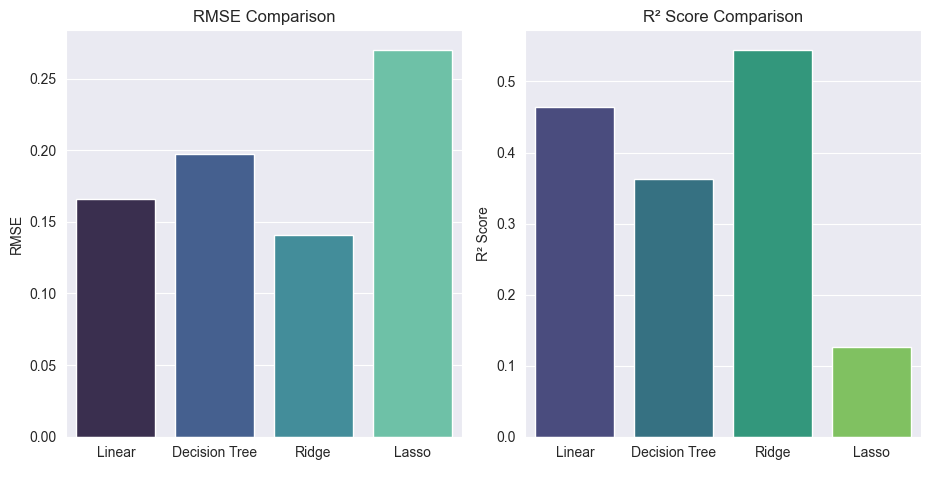

In [133]:
#Bar plots of model metrics
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# RMSE plot
plt.subplot(1, 3, 1)
sns.barplot(x=models, y=rmse,hue = models, palette='mako',legend = False)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel(' ')


# R² Score plot
plt.subplot(1, 3, 2)
sns.barplot(x=models, y=r2, hue =models,palette='viridis',legend =False)
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel(' ')

plt.tight_layout()
plt.show()

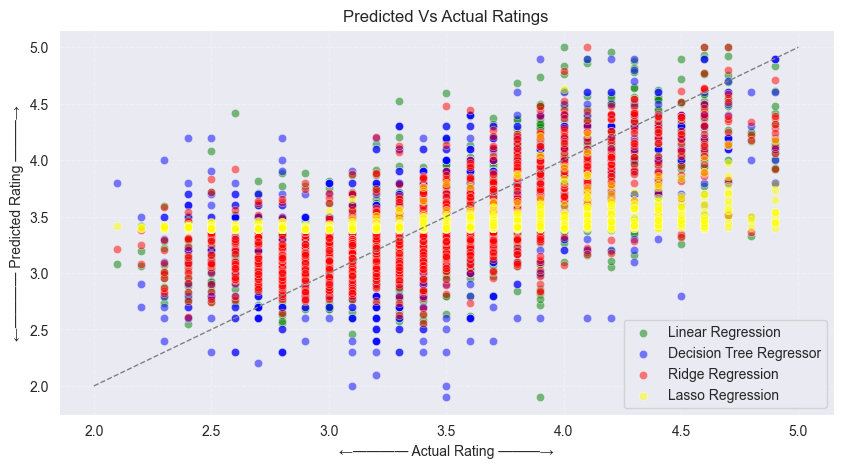

In [134]:
#Scatter plot of predicted vs Actual Ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test,y=y_pred_lr,label = "Linear Regression",color='green',alpha =0.5)
sns.scatterplot(x=y_test,y=y_pred_dt,label = "Decision Tree Regressor",color='blue',alpha =0.5)
sns.scatterplot(x=y_test,y=y_pred_rg,label = "Ridge Regression",color='red',alpha =0.5)
sns.scatterplot(x=y_test,y=y_pred_ls,label = "Lasso Regression",color='yellow',alpha =0.5)
plt.plot([2,5],[2,5],'gray',linestyle='--',linewidth=1)
plt.xlabel("←———— Actual Rating ———→")
plt.ylabel("←———— Predicted Rating ———→")
plt.title("Predicted Vs Actual Ratings")
plt.legend()
plt.grid(True,linestyle='--',alpha=0.3)
plt.show()


In [135]:
#Extracting feature names from preprocessor
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['cat_ordinal__has_online_delivery',
       'cat_ordinal__is_delivering_now', 'cat_ordinal__has_table_booking',
       ..., 'cat__cuisines_World Cuisine, Mexican, Italian',
       'num__average_cost_for_two', 'num__votes'],
      shape=(2654,), dtype=object)

In [136]:
#Top features-Linear regression
coefficients_lr = pd.Series(lr.coef_, index=feature_names)
important_features_lr = coefficients_lr.sort_values(key =np.abs,ascending=False)
print("Top 10 Influential Features [Linear Regression]:",important_features_lr.head(10))

Top 10 Influential Features [Linear Regression]: cat__cuisines_Continental, American, Italian, North Indian, Chinese, Cafe    3.186536
cat__locality_Mission Bay                                                   -2.057327
cat__locality_Koramangala 5th Block                                         -1.937637
cat__cuisines_Italian, European                                             -1.885133
cat__cuisines_Burger, German, Sandwich                                      -1.715735
cat__cuisines_Mexican, American, Healthy Food                                1.575307
cat__cuisines_American, Chinese, North Indian                               -1.560037
cat__cuisines_Italian, American, Pizza                                      -1.523189
cat__cuisines_Bakery, Arabian, Middle Eastern                                1.465489
cat__locality_INA Colony                                                    -1.445020
dtype: float64


In [137]:
#Top features - Decision Tree
coefficients_dt = pd.Series(dt.feature_importances_, index=feature_names)
important_features_dt = coefficients_dt.sort_values( ascending=False)
print("Top 10 Influential Features [Decision Tree]:", important_features_dt.head(10))


Top 10 Influential Features [Decision Tree]: num__votes                                      0.474306
num__average_cost_for_two                       0.080148
cat__city_New Delhi                             0.022765
cat__city_Noida                                 0.016978
cat_ordinal__has_online_delivery                0.012644
cat__city_Rio de Janeiro                        0.010386
cat__city_Gurgaon                               0.009223
cat_ordinal__has_table_booking                  0.008444
cat__cuisines_North Indian, Chinese             0.007348
cat__cuisines_North Indian, Mughlai, Chinese    0.006749
dtype: float64


In [138]:
#Top features - Ridge Regression
coefficients_rg = pd.Series(rg.coef_, index=feature_names)
important_features_rg = coefficients_rg.sort_values(key=np.abs, ascending=False)
print("Top 10 Influential Features [Ridge Regression]:", important_features_rg.head(10))


Top 10 Influential Features [Ridge Regression]: cat__cuisines_Italian, European                                             -0.927583
cat__locality_Mission Bay                                                   -0.925708
cat__cuisines_Lebanese, Arabian, Moroccan                                   -0.863717
cat__cuisines_Mexican, American, Healthy Food                                0.761960
cat__cuisines_Italian, Pizza, Bakery                                        -0.756814
cat__cuisines_Continental, American, Italian, North Indian, Chinese, Cafe    0.749889
cat__cuisines_Burger, German, Sandwich                                      -0.722109
cat__cuisines_American, Fast Food, Burger                                   -0.713670
cat__cuisines_American, Chinese, North Indian                               -0.688783
cat__city_Faridabad                                                         -0.671574
dtype: float64


In [139]:
#Top features - Lasso Regression
coefficients_ls = pd.Series(ls.coef_, index=feature_names)
important_features_ls = coefficients_ls.sort_values(key=np.abs, ascending=False)
print("Top 10 Influential Features [Lasso Regression]:", important_features_ls.head(10))


Top 10 Influential Features [Lasso Regression]: num__votes                          0.120989
cat__city_Aurangabad               -0.000000
cat_ordinal__has_online_delivery   -0.000000
cat_ordinal__is_delivering_now     -0.000000
cat_ordinal__has_table_booking      0.000000
cat__city_Abu Dhabi                 0.000000
cat__city_Agra                      0.000000
cat__city_Ahmedabad                 0.000000
cat__city_Albany                    0.000000
cat__city_Allahabad                -0.000000
dtype: float64


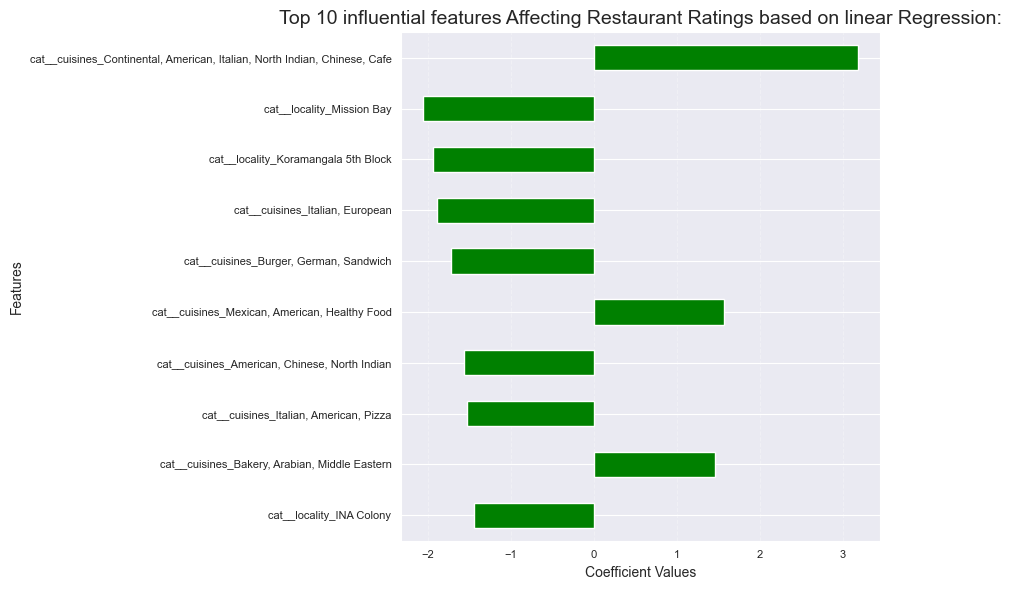

In [140]:
#top 10 influential features affecting restaurant rating based on linear regression
important_features_lr.head(10).reindex(
    important_features_lr.head(10).abs().sort_values().index).plot(kind='barh',figsize=(9,6),color='green')

plt.title("Top 10 influential features Affecting Restaurant Ratings based on linear Regression:",fontsize=14)
plt.xlabel('Coefficient Values',fontsize=10)
plt.ylabel('Features',fontsize=10)
plt.grid(True,axis='x',linestyle='--',alpha=0.3)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


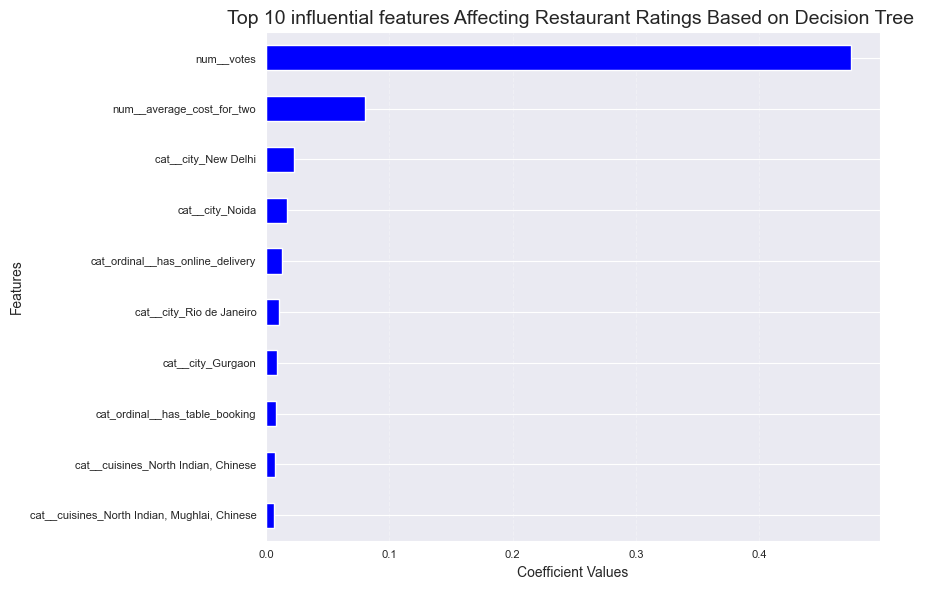

In [141]:
#top 10 influential features affecting restaurant rating based on Decision tree
important_features_dt.head(10).reindex(
    important_features_dt.head(10).abs().sort_values().index).plot(kind='barh',figsize=(9,6),color='blue')

plt.title("Top 10 influential features Affecting Restaurant Ratings Based on Decision Tree ",fontsize=14)
plt.xlabel('Coefficient Values',fontsize=10)
plt.ylabel('Features',fontsize=10)
plt.grid(True,axis='x',linestyle='--',alpha=0.3)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

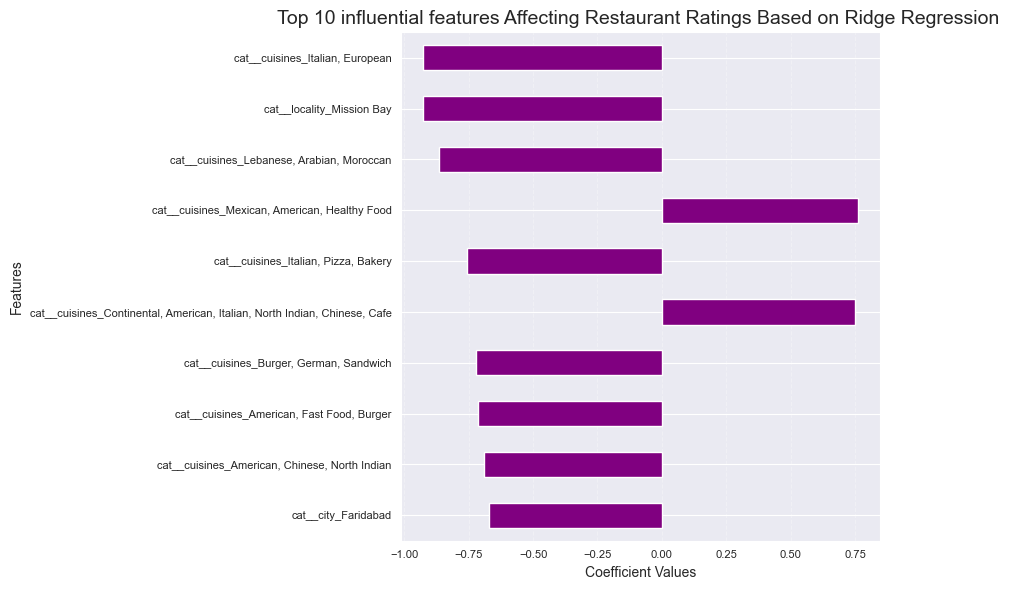

In [142]:
#top 10 influential features affecting restaurant rating based on ridge regression
important_features_rg.head(10).reindex(
    important_features_rg.head(10).abs().sort_values().index).plot(kind='barh',figsize=(9,6),color='purple')

plt.title("Top 10 influential features Affecting Restaurant Ratings Based on Ridge Regression ",fontsize=14)
plt.xlabel('Coefficient Values',fontsize=10)
plt.ylabel('Features',fontsize=10)
plt.grid(True,axis='x',linestyle='--',alpha=0.3)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

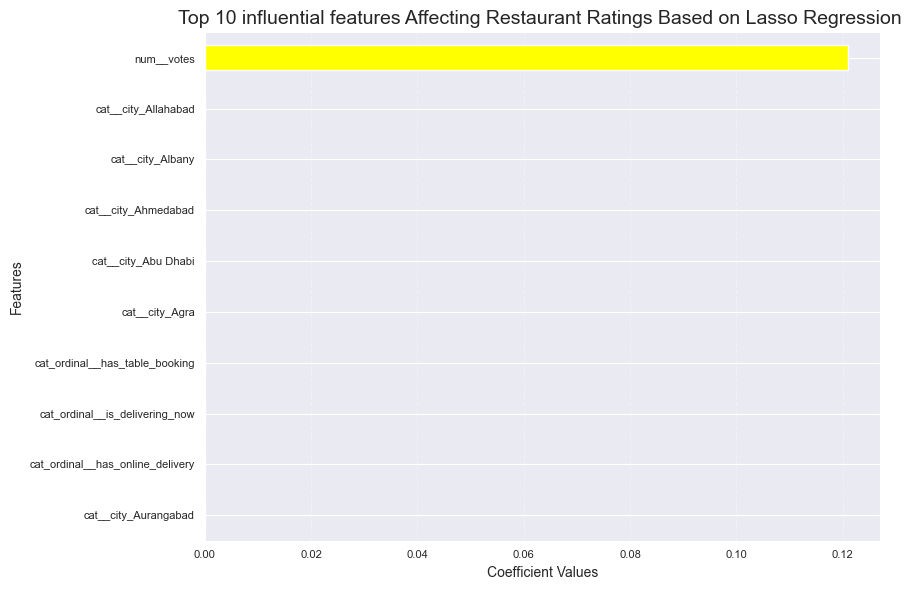

In [143]:
#top 10 influential features affecting restaurant rating based on lasso regression
important_features_ls.head(10).reindex(
    important_features_ls.head(10).abs().sort_values().index).plot(kind='barh',figsize=(9,6),color='yellow')

plt.title("Top 10 influential features Affecting Restaurant Ratings Based on Lasso Regression ",fontsize=14)
plt.xlabel('Coefficient Values',fontsize=10)
plt.ylabel('Features',fontsize=10)
plt.grid(True,axis='x',linestyle='--',alpha=0.3)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()